In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

In [2]:
data = pd.read_csv("C:/Regr.csv", encoding='cp1251', sep=';')
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [4]:
for i in ['longdist', 'local']:
    if i in data.columns:
        data[i]=data[i].str.replace(',', '.').astype('float')

In [5]:
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,23.76,0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,14.15,0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null object
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(4), object(8)
memory usage: 415.5+ KB


In [7]:
data['income']=data['income'].str.replace(',', '.').astype('float')

In [8]:
data['internat']=data['internat'].str.replace(',', '.').astype('float')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


In [10]:
data.isnull().sum() #пропуски будут заполнены после разбиения на обучающую и тестовую

longdist    1
internat    4
local       3
int_disc    1
billtype    4
pay         2
age         3
gender      1
marital     4
children    1
income      1
churn       0
dtype: int64

In [11]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']   #Поиск редких категорий
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital,churn
count,4430,4427,4429,4430,4427,4431
unique,2,2,4,2,2,2
top,Нет,Бюджетный,CC,Женский,Женат,Остается
freq,3054,2244,2561,2244,2625,2496


In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']      # Редкая категория CD,
for c in categorical_columns:                                                          # заменим её модой по параметру billtype,
    print(data[c].value_counts(dropna=False))                                          # т.к. скорее всего это ошибка ввода

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64
Остается    2496
Уходит      1935
Name: churn, dtype: int64


In [13]:
data.at[data['pay'] == 'CD', 'pay'] = 'CC'                            #заменяем параметр

In [14]:
data['pay'].value_counts(dropna=False)                                #проверяем, что все OK

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

In [15]:
train=data.sample(frac=0.7,random_state=200)                          #разбиваем данные на обучающую и контрольную выборки
test=data.drop(train.index)                                           #т.к. пропуски выделять в отдельные категории не требуется

In [16]:
train.isnull().sum()

longdist    1
internat    4
local       2
int_disc    0
billtype    4
pay         2
age         2
gender      1
marital     3
children    1
income      1
churn       0
dtype: int64

In [17]:
test.isnull().sum()

longdist    0
internat    0
local       1
int_disc    1
billtype    0
pay         0
age         1
gender      0
marital     1
children    0
income      0
churn       0
dtype: int64

In [18]:
for i in ['longdist', 'local', 'age', 'income']:
    if i in train.columns:
        train[i].fillna(train[i].median(), inplace=True)

In [19]:
for i in ['longdist', 'local', 'age', 'income']:
    if i in test.columns:
        test[i].fillna(train[i].median(), inplace=True)

In [20]:
train['internat'] = train['internat'].fillna('0').astype(float)   # в случае международных звонов правильно будет заполнить именно модой

In [21]:
test['internat'] = test['internat'].fillna('0')

In [22]:
train.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    4
pay         2
age         0
gender      1
marital     3
children    1
income      0
churn       0
dtype: int64

In [23]:
test.isnull().sum()

longdist    0
internat    0
local       0
int_disc    1
billtype    0
pay         0
age         0
gender      0
marital     1
children    0
income      0
churn       0
dtype: int64

In [24]:
test['int_disc'].mode()                                 #определяем моду

0    Нет
dtype: object

In [25]:
test['int_disc'] = test['int_disc'].fillna('Нет')    #заполняем значения Модой

In [26]:
test['marital'].mode()

0    Женат
dtype: object

In [27]:
test['marital'] = test['marital'].fillna('Женат')

In [28]:
train['marital'].mode()

0    Женат
dtype: object

In [29]:
train['marital'] = train['marital'].fillna('Женат')

In [30]:
train['billtype'].mode()

0    Бюджетный
dtype: object

In [31]:
train['billtype'] = train['billtype'].fillna('Бюджетный')

In [32]:
train['pay'].mode()

0    CC
dtype: object

In [33]:
train['pay'] = train['pay'].fillna('CC')

In [34]:
train['gender'].mode()

0    Мужской
dtype: object

In [35]:
train['gender'] = train['gender'].fillna('Мужской')

In [36]:
train['children'].mode()

0    0.0
dtype: float64

In [37]:
train['children'] = train['children'].fillna('0')

In [38]:
print(train['children'].value_counts(dropna=False))

0.0    1067
2.0    1053
1.0     981
0         1
Name: children, dtype: int64


In [39]:
train.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    0
pay         0
age         0
gender      0
marital     0
children    0
income      0
churn       0
dtype: int64

In [40]:
test.isnull().sum()

longdist    0
internat    0
local       0
int_disc    0
billtype    0
pay         0
age         0
gender      0
marital     0
children    0
income      0
churn       0
dtype: int64

In [41]:
train['children']=train['children'].astype('int64')

In [42]:
test['children']=test['children'].astype('int64')

In [43]:
test['age']=test['age'].astype('int64')

In [44]:
train['age']=train['age'].astype('int64')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 12 columns):
longdist    3102 non-null float64
internat    3102 non-null float64
local       3102 non-null float64
int_disc    3102 non-null object
billtype    3102 non-null object
pay         3102 non-null object
age         3102 non-null int64
gender      3102 non-null object
marital     3102 non-null object
children    3102 non-null int64
income      3102 non-null float64
churn       3102 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 315.0+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 2 to 4430
Data columns (total 12 columns):
longdist    1329 non-null float64
internat    1329 non-null float64
local       1329 non-null float64
int_disc    1329 non-null object
billtype    1329 non-null object
pay         1329 non-null object
age         1329 non-null int64
gender      1329 non-null object
marital     1329 non-null object
children    1329 non-null int64
income      1329 non-null float64
churn       1329 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 135.0+ KB


In [47]:
print(train['children'].value_counts(dropna=False))

0    1068
2    1053
1     981
Name: children, dtype: int64


In [48]:
bins = [-np.inf, 30, 40, 45, 92, np.inf]                             #Здесь и ниже Деление выполнено в дедакторе
train['age'] = pd.cut(train['age'], bins)                            # с помощью конечных классов
test['age'] = pd.cut(test['age'], bins)

In [49]:
print(train['age'].value_counts(dropna=False))

(45.0, 92.0]    1874
(-inf, 30.0]     474
(30.0, 40.0]     385
(92.0, inf]      209
(40.0, 45.0]     160
Name: age, dtype: int64


In [50]:
bins = [-np.inf,0.095, np.inf]                             
train['internat'] = pd.cut(train['internat'], bins)        #Не увидел здесь возможности для нормализации, т.к. слишком много
test['internat'] = pd.cut(test['internat'], bins)          #Нулевых значений

In [51]:
print(train['internat'].value_counts(dropna=False))

(-inf, 0.095]    2586
(0.095, inf]      516
Name: internat, dtype: int64


In [52]:
bins = [-np.inf,0.7495, np.inf]                         
train['longdist'] = pd.cut(train['longdist'], bins)        #Не увидел здесь возможности для нормализации, т.к. слишком много
test['longdist'] = pd.cut(test['longdist'], bins)          #Нулевых значений
#Отсутствие межгорода ведет к уходу клиента как и наличие у него звонков зарубеж

In [53]:
print(train['longdist'].value_counts(dropna=False))

(0.75, inf]     2693
(-inf, 0.75]     409
Name: longdist, dtype: int64


In [54]:
bins = [-np.inf,27534, np.inf]                             
train['income'] = pd.cut(train['income'], bins)        #Нормализация невозможна, т.к. переменная находится в жестких границах
test['income'] = pd.cut(test['income'], bins)
#разделение дохода получилось условно на до среднего класса и выше. Люди с низким доходом склонны уходить от операторов чаще.

In [55]:
print(train['income'].value_counts(dropna=False))

(27534.0, inf]     2287
(-inf, 27534.0]     815
Name: income, dtype: int64


C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


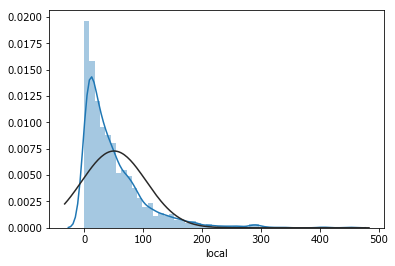

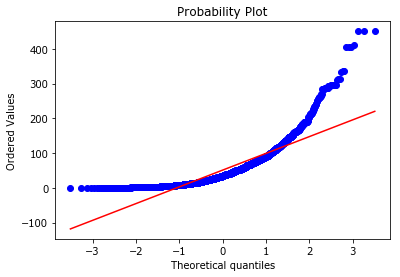

In [56]:
import seaborn as sns

# импортируем norm и stats
from scipy.stats import norm
from scipy import stats
sns.distplot(train['local'], fit=norm);           #нормальизуем длительность местных звонков
fig = plt.figure()
res = stats.probplot(train['local'], plot=plt)

In [57]:
train['local'].skew()

2.4074034736736016

In [58]:
train['local'].kurtosis()

8.610907194368137

In [59]:
from scipy.stats import boxcox

transformed, lam = boxcox(train['local'])

print('Lambda: %f' % lam)

Lambda: 0.232215


C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


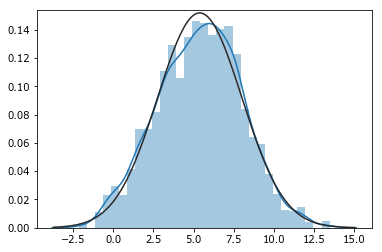

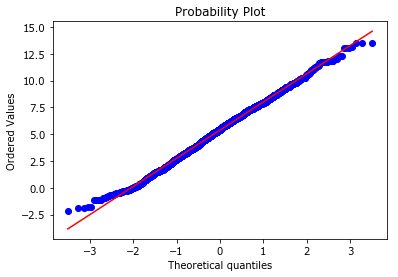

In [60]:
sns.distplot(transformed, fit=norm);
fig = plt.figure()
res = stats.probplot(transformed, plot=plt)

In [61]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn'] 

Переменные после get_dummies:
 ['local', 'children', 'longdist_(-inf, 0.75]', 'longdist_(0.75, inf]', 'internat_(-inf, 0.095]', 'internat_(0.095, inf]', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'age_(-inf, 30.0]', 'age_(30.0, 40.0]', 'age_(40.0, 45.0]', 'age_(45.0, 92.0]', 'age_(92.0, inf]', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'income_(-inf, 27534.0]', 'income_(27534.0, inf]', 'churn_Остается', 'churn_Уходит']
Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn'] 

Переменные после get_dummies:
 ['local', 'children', 'longdist_(-inf, 0.75]', 'longdist_(0.75, inf]', 'internat_(-inf, 0.095]', 'internat_(0.095, inf]', 'int_disc_Да', 'int_disc_Нет', 'b

In [62]:
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3102 entries, 2157 to 4105
Data columns (total 26 columns):
local                     3102 non-null float64
children                  3102 non-null int64
longdist_(-inf, 0.75]     3102 non-null uint8
longdist_(0.75, inf]      3102 non-null uint8
internat_(-inf, 0.095]    3102 non-null uint8
internat_(0.095, inf]     3102 non-null uint8
int_disc_Да               3102 non-null uint8
int_disc_Нет              3102 non-null uint8
billtype_Бесплатный       3102 non-null uint8
billtype_Бюджетный        3102 non-null uint8
pay_Auto                  3102 non-null uint8
pay_CC                    3102 non-null uint8
pay_CH                    3102 non-null uint8
age_(-inf, 30.0]          3102 non-null uint8
age_(30.0, 40.0]          3102 non-null uint8
age_(40.0, 45.0]          3102 non-null uint8
age_(45.0, 92.0]          3102 non-null uint8
age_(92.0, inf]           3102 non-null uint8
gender_Женский            3102 non-null uint8
gender_Мужской

In [63]:
test_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 2 to 4430
Data columns (total 26 columns):
local                     1329 non-null float64
children                  1329 non-null int64
longdist_(-inf, 0.75]     1329 non-null uint8
longdist_(0.75, inf]      1329 non-null uint8
internat_(-inf, 0.095]    1329 non-null uint8
internat_(0.095, inf]     1329 non-null uint8
int_disc_Да               1329 non-null uint8
int_disc_Нет              1329 non-null uint8
billtype_Бесплатный       1329 non-null uint8
billtype_Бюджетный        1329 non-null uint8
pay_Auto                  1329 non-null uint8
pay_CC                    1329 non-null uint8
pay_CH                    1329 non-null uint8
age_(-inf, 30.0]          1329 non-null uint8
age_(30.0, 40.0]          1329 non-null uint8
age_(40.0, 45.0]          1329 non-null uint8
age_(45.0, 92.0]          1329 non-null uint8
age_(92.0, inf]           1329 non-null uint8
gender_Женский            1329 non-null uint8
gender_Мужской   

In [64]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']

In [65]:
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)

In [66]:
#создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'local':'income_(27534.0, inf]']
X_test = test_dummies.loc[:, 'local':'income_(27534.0, inf]']

In [67]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создаем экземпляр класса StandardScaler
scaler = StandardScaler()

In [68]:
# подгоняем модель
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
# преобразовываем данные и по отмасштабированным данным
# уже можно будет строить логистическую регрессию
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[-0.92744377 -1.20351865 -0.38971173 -2.56599924 -2.23866655 -0.44669448
 -0.67097718 -1.49036365 -0.98846115 -1.01167355 -0.49172496 -1.18360838
 -0.53385779 -0.42469436 -0.37643114 -0.23320543 -1.23533746 -0.26878122
 -0.99871134 -1.00129032 -1.1922859  -0.83872501 -0.59696067 -1.67515222]
Максимальное значение для каждого признака
 [7.29801188 1.21521465 2.56599924 0.38971173 0.44669448 2.23866655
 1.49036365 0.67097718 1.01167355 0.98846115 2.0336572  0.84487405
 1.87315801 2.35463454 2.65652835 4.28806483 0.80949541 3.72049799
 1.00129032 0.99871134 0.83872501 1.1922859  1.67515222 0.59696067]


In [71]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score

# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression

# строим модель логистической регрессии на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.893
AUC на контрольной выборке: 0.886
